In [1]:
import pandas as pd
import os

In [2]:
##Merging twelve monthss of data as a single file.
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

all_months_data=pd.DataFrame() # this will create an empty dataframe.

files=[file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df]) #this will concatanate the datas.

    
all_months_data.to_csv("all_data.csv",index=False) 
all_months_data.head()    


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_data=pd.read_csv("all_Data.csv")

Clean the Data

In [4]:
nan_df=all_data[all_data.isna().any(axis=1)]
#kind of used to know which rows are there where NaN is there.

all_data=all_data.dropna(how='all')

#all_data.head()

all_data=all_data[all_data['Order Date'].str[0:2]!='Or']


Add Month Column

In [5]:
all_data['Month']=all_data['Order Date'].str[0:2] #this will add a columng of name 'Month'
all_data['Month']=pd.to_numeric(all_data['Month']) #convert the stuff to numeric data
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#all_data.head()

Add a city column

In [6]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] #python treats the separator as a line. left and right two different segments are produced, left is produced even if it is completely blank/NULL.

all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x)+' ('+get_state(x)+')')

#all_data=all_data.drop(['Column'],axis=1) this command was used for dropping a particular column


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


Add a sales column

In [7]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']


In [8]:
results=all_data.groupby('Month').sum()['Sales']

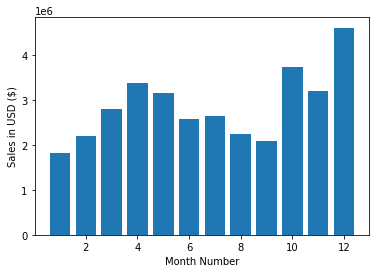

In [9]:
import matplotlib.pyplot as plt

months=range(1,13)

plt.bar(months,results)

plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')

plt.show()

In [10]:
results=all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


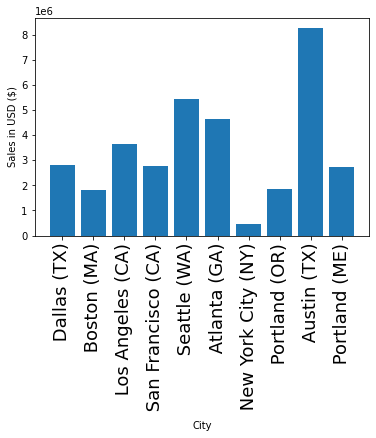

In [11]:
import matplotlib.pyplot as plt

cities=all_data['City'].unique() #will take only the unique city bvalues, to avoid eperition

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=18)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')

plt.show()

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [13]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date']) # convert the stuff to a good format.

In [14]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [15]:
all_data['Minute'] = all_data['Order Date'].dt.minute

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


In [36]:
hours=all_data['Hour'].unique()
result=all_data.groupby(['Hour']).count()#here we wish to check that at what particlar hour, the TOTAL number of sales was the highest. so here it is.
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


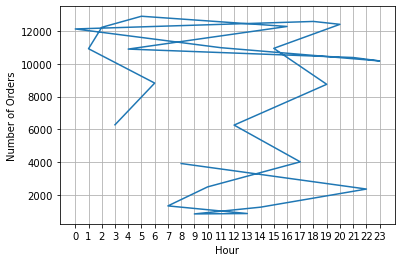

In [39]:
plt.plot(hours,result['Product'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()#will basically do gridding the entire graph
plt.show()

WHICH PRODUCTS ARE OFTEN SOLD TOGETHER???

In [ ]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]